# Hertzsprung-Russell Diagram

> The Hertzsprung–Russell diagram, abbreviated H–R diagram or HRD, is a scatter graph of stars showing the relationship between the stars' absolute magnitudes or luminosities versus their spectral classifications or effective temperatures. More simply, it plots each star on a graph measuring the star's brightness against its temperature (color). It does not map any locations of stars.
>
> --[_Wikipedia_](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram)

Based on [zonination's original work](https://www.reddit.com/r/dataisbeautiful/comments/433960).

Data from the [HYG star database archive](https://github.com/astronexus/HYG-Database).

## Step 1: Download the data and clean it

In [21]:
!curl -O https://raw.githubusercontent.com/amorriscode/Hertzsprung-Russell/master/data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1129  100  1129    0     0   6102      0 --:--:-- --:--:-- --:--:--  6102


In [22]:
!ls -l | grep data

-rw-r--r-- 1 root root 1129 Feb 26 17:05 data.csv
drwxr-xr-x 1 root root 4096 Feb 24 17:49 sample_data


In [23]:
import pandas as pd

# The H-R diagram only shows the absolute magnitude and the color index.
# Every other column is discarded, and the ones with null values are dropped.
df = pd.read_csv('data.csv')[['luminosity', 'temperature']]
df.dropna(inplace=True) # drops 1882 rows

print(len(df), "total rows")
df.head(3)

48 total rows


,luminosity,temperature
0,1.00,5800
1,1.50,5800
2,0.33,4200


## Step 2: Explore the data

In [24]:
%matplotlib inline

Seaborn is way easier for these kinds of plots, so we leave out matplotlib for a while.

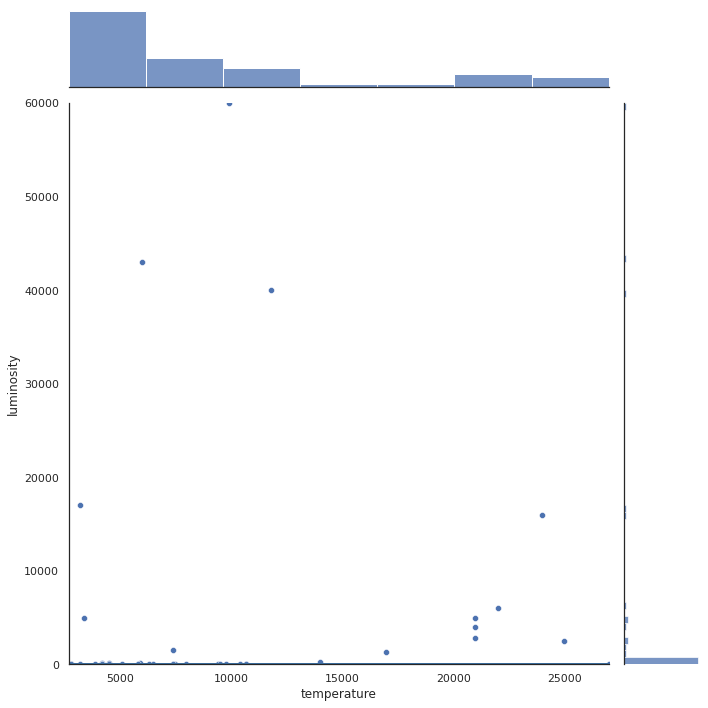

In [30]:
import seaborn as sns
sns.set(style="white")

xlim = (min(df['temperature']) - 1, max(df['temperature']))
ylim = (min(df['luminosity']) - 1, max(df['luminosity']) + 1)

ax = sns.jointplot(
    x="temperature", y="luminosity", data=df.sample(len(df)),
    xlim=xlim, ylim=ylim,
    height=10, ratio=6)

for x, y in [([2.5, 2.5], ylim), ([-.5, -.5], ylim), (xlim, [18, 18]), (xlim, [-16, -16])]:
    ax.ax_joint.plot(x, y, sns.xkcd_rgb["flat blue"], lw=3)

The distribution of the data points in both variables allows for the definition of cutoff points delimiting the zones of high data density. The points belonging to these regions will be plotted, discarding the rest as outliers.

## Step 3: Plot the data

(0.0001, 100000)

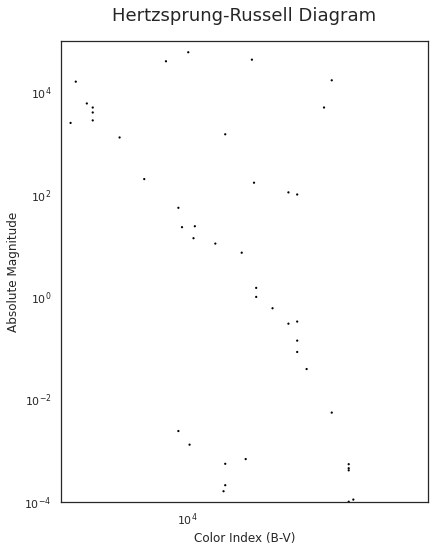

In [40]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(
    figsize=(6, 8),
    dpi=72)
# Leave room for axis labels and title.
# http://stackoverflow.com/a/19576608
ax = fig.add_axes([.1, .1, .85, .8])

ax.set_title('Hertzsprung-Russell Diagram', fontsize=18)
# Move title by treating it as a simple text instance
# http://stackoverflow.com/a/16420635/3402367
ax.title.set_position([.5, 1.03])
ax.set_xlabel('Temperature')
ax.set_ylabel('Luminosity')

ax.scatter(
    df['temperature'],
    df['luminosity'],
    marker='.',
    # define marker size
    # http://stackoverflow.com/a/14860958/3402367
    s=[20] * len(df),
    facecolors='black',
    linewidth=0)

ax.set_xscale('log')
ax.set_xlim(27000,1500)

ax.set_yscale('log')
ax.set_ylim(pow(10,-4), pow(10,5))

# uncomment to save figure
#plt.savefig("Hertzsprung-Russell.png", dpi=72)

## Step 4: Style the data

Conversion of B-V Color Index to sRGB, following a [StackOverflow post by melhosseiny](http://stackoverflow.com/q/21977786) and translating the solution to Python. The gamma values have been slightly tweaked for better results.

In [109]:
import math

def temp2rgb(colour_temperature):
    if colour_temperature < 1000: 
        colour_temperature = 1000
    elif colour_temperature > 40000:
        colour_temperature = 40000
    
    tmp_internal = colour_temperature / 100.0
    
    # red 
    if tmp_internal <= 66:
        red = 255
    else:
        red = 329.698727446 * math.pow(tmp_internal - 60, -0.1332047592)
        if red < 0:
            red = 0
        elif red > 255:
            red = 255
    
    # green
    if tmp_internal <=66:
        green = 99.4708025861 * math.log(tmp_internal) - 161.1195681661
        if green < 0:
            green = 0
        elif green > 255:
            green = 255
    else:
        green = 288.1221695283 * math.pow(tmp_internal - 60, -0.0755148492)
        if green < 0:
            green = 0
        elif green > 255:
            green = 255
    
    # blue
    if tmp_internal >=66:
        blue = 255
    elif tmp_internal <= 19:
        blue = 0
    else:
        blue = 138.5177312231 * math.log(tmp_internal - 10) - 305.0447927307
        if blue < 0:
            blue = 0
        elif blue > 255:
            blue = 255

    return [red/255., green/255., blue/255., 1]

color = df['temperature'].apply(temp2rgb)

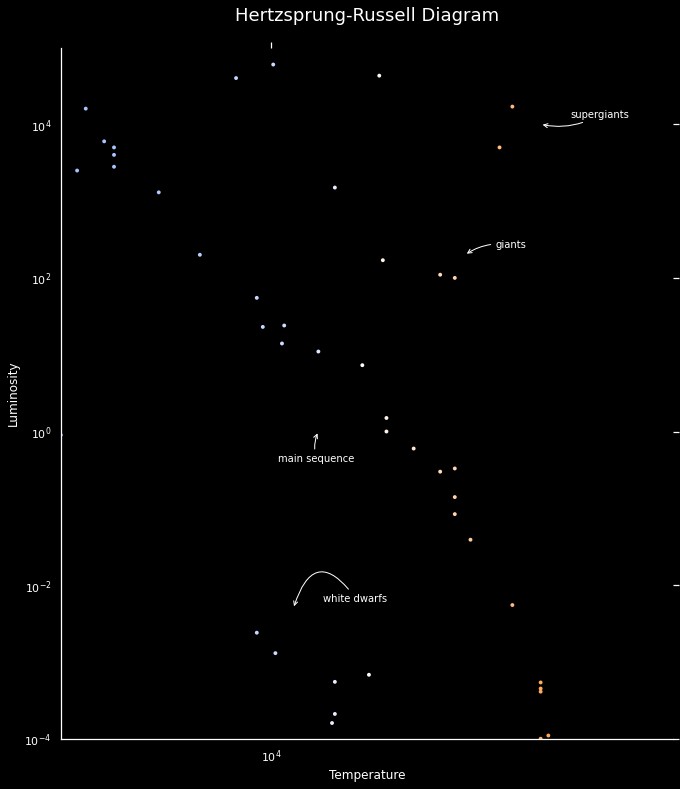

In [116]:
fig = plt.figure(
    figsize=(10, 12),
    facecolor='black',
    dpi=72)
ax = fig.add_axes([.1, .1, .85, .8])

ax.set_facecolor('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram', color='white', fontsize=18)
ax.title.set_position([.5, 1.03])
ax.set_xlabel('Temperature', color='white')
ax.set_ylabel('Luminosity', color='white')

ax.scatter(
    df['temperature'],
    df['luminosity'],
    marker='.',
    s=[60] * len(df),
    facecolors=color,
    linewidth=0)

ax.set_xscale('log')
ax.set_xlim(27000,1500)

ax.set_yscale('log')
ax.set_ylim(pow(10,-4), pow(10,5))

ax.tick_params(top='off', right='off', direction='out', colors='white')

ax.annotate(
    'main sequence', xy=(8000, 1), xycoords='data',
    fontsize='small', color='white',
    xytext=(-40, -30), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=-.2",
        color='white'))

ax.annotate(
    'giants', xy=(4000, 200), xycoords='data',
    fontsize='small', color='white',
    xytext=(30, 7), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=.2",
        color='white'))

ax.annotate(
    'supergiants', xy=(2800, 10000), xycoords='data',
    fontsize='small', color='white',
    xytext=(30, 7), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=-.2",
        color='white'))

ax.annotate(
    'white dwarfs', xy=(9000, 0.005), xycoords='data',
    fontsize='small', color='white',
    xytext=(30, 7), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=1",
        color='white'));

# uncomment to save figure
#plt.savefig("Hertzsprung-Russell.png", facecolor='black', edgecolor='white', dpi=72)

## Step 5: Animate the data

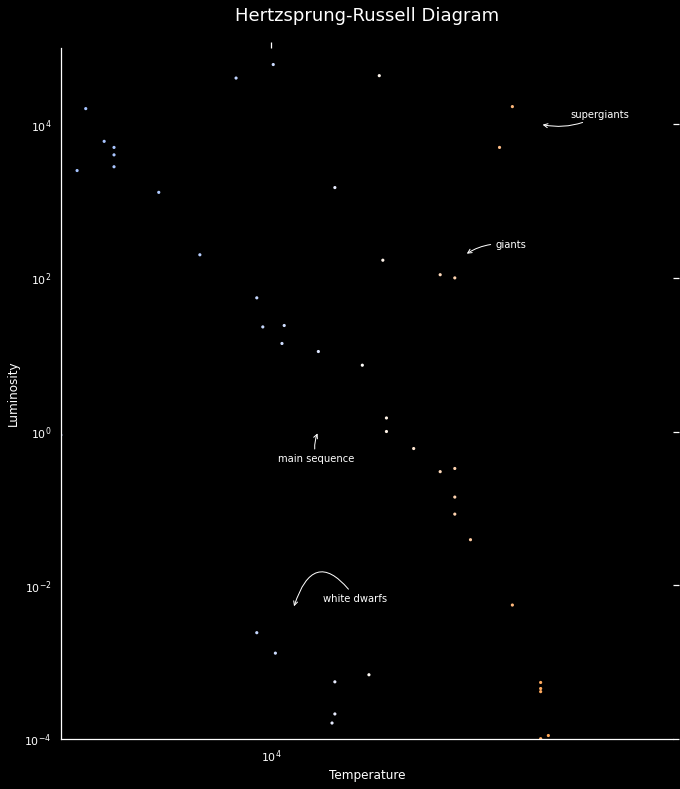

In [117]:
fig = plt.figure(
    figsize=(10, 12),
    facecolor='black',
    dpi=72)
ax = fig.add_axes([.1, .1, .85, .8])


ax.set_facecolor('black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram', color='white', fontsize=18)
ax.title.set_position([.5, 1.03])
ax.set_xlabel('Temperature', color='white')
ax.set_ylabel('Luminosity', color='white')

ax.scatter(
    df['temperature'],
    df['luminosity'],
    marker='.',
    s=[40] * len(df),
    facecolors=[[1, 1, 1, .02] for _ in range(len(df))],
    linewidth=0)

scatter = ax.scatter(
    df['temperature'],
    df['luminosity'],
    marker='.',
    s=[40] * len(df),
    facecolors=color,
    linewidth=0)

twinkle = np.vectorize(lambda x: np.clip(x + np.random.ranf(), 0, 1) if x < 1. else 0.)
def update(_):
    idx = np.random.choice([True, False], len(scatter.get_facecolors()), p=[.5, .5])
    scatter.get_facecolors()[idx, 3] = twinkle(scatter.get_facecolors()[idx, 3])

ax.set_xscale('log')
ax.set_xlim(27000,1500)

ax.set_yscale('log')
ax.set_ylim(pow(10,-4), pow(10,5))

ax.tick_params(top='off', right='off', direction='out', colors='white')

ax.annotate(
    'main sequence', xy=(8000, 1), xycoords='data',
    fontsize='small', color='white',
    xytext=(-40, -30), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=-.2",
        color='white'))

ax.annotate(
    'giants', xy=(4000, 200), xycoords='data',
    fontsize='small', color='white',
    xytext=(30, 7), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=.2",
        color='white'))

ax.annotate(
    'supergiants', xy=(2800, 10000), xycoords='data',
    fontsize='small', color='white',
    xytext=(30, 7), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=-.2",
        color='white'))

ax.annotate(
    'white dwarfs', xy=(9000, 0.005), xycoords='data',
    fontsize='small', color='white',
    xytext=(30, 7), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=1",
        color='white'));

# plt.close()

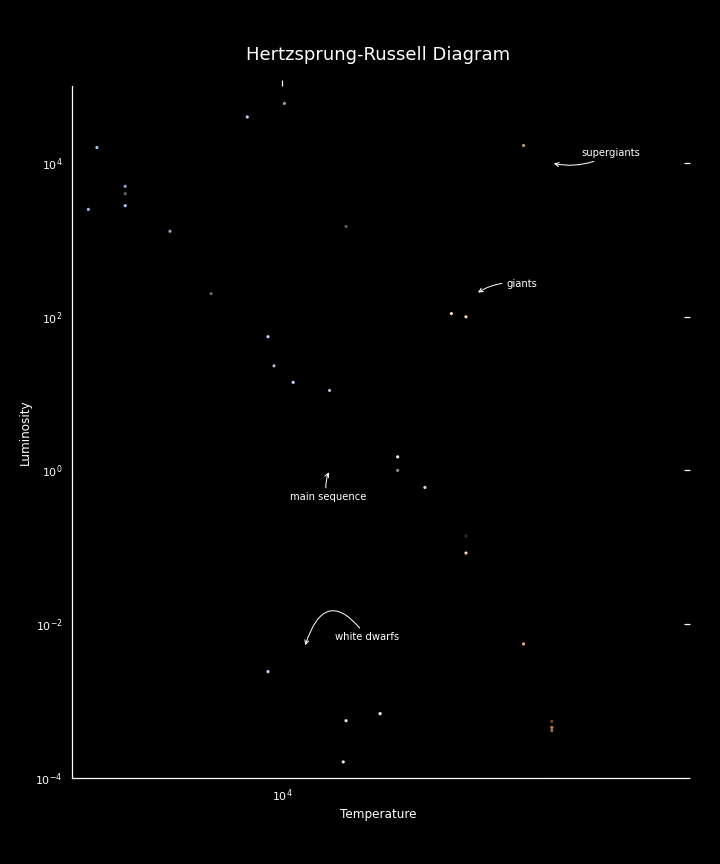

In [120]:
from matplotlib.animation import FuncAnimation
from IPython.display import Image, display

ani = FuncAnimation(fig, update, frames=24)
ani.save('Hertzsprung-Russell.gif', writer='pillow', fps=60, dpi=240, savefig_kwargs={
        'facecolor': 'black',
        'edgecolor': 'white'})

with open('Hertzsprung-Russell.gif','rb') as f:
    display(Image(f.read()))